<a href="https://colab.research.google.com/github/maisaahmad/MASAR-Bootcamp/blob/main/MasarFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First part of the project  


> # House Price prediction

The dataset represents a synthetic collection of house-related features and their corresponding prices. It contains 1000 samples, with each sample having the following features:







*   Size: The size of the house
*   Bedrooms: The number of bedrooms in the house
*  Bathrooms: The number of bathrooms in the house
*   Location: A feature representing the location of the house
*   YearBuilt: The year the house was built
*  RoofType: The type of roof on the house
*  Price: The price of the house






##1- Data Cleaning

In [ ]:
#import pandas to Load the data into a Pandas DataFrame.

import matplotlib.pyplot as plt
import plotly.express as px

import pandas as pd
data = pd.read_csv ('/content/Copy of house_prices_dataset.csv')
data


,Size,Bedrooms,Bathrooms,Location,YearBuilt,RoofType,Price
0,-0.325611,0.257199,0.007880,-0.164335,-0.240665,0.212093,-16.984913
1,-0.202193,1.277665,0.547097,-0.217681,-0.591571,1.098777,24.031693
2,-2.153731,0.975713,0.685858,0.446982,0.000756,-0.638586,57.305959
3,-0.939880,-1.304470,0.366598,-0.513867,0.669673,-1.059214,-81.049670
4,-0.570351,1.223083,0.352505,-1.820603,-0.258854,0.270057,-127.396000
...,...,...,...,...,...,...,...
995,NaN,0.689164,-0.273729,0.149598,-0.683634,0.097827,13.634300
996,-0.564079,-1.021233,0.243801,-1.280304,0.708356,0.872457,-138.161669
997,-0.981166,-1.725807,1.194109,-0.464404,-0.677565,0.462061,-94.896020
998,NaN,1.158596,0.963376,0.822060,-0.820682,1.896793,133.087712


In [ ]:
# Explor the data
print("First few rows of  house prices dataset:")
display(data.head())

First few rows of  house prices dataset:


,Size,Bedrooms,Bathrooms,Location,YearBuilt,RoofType,Price
0,-0.325611,0.257199,0.007880,-0.164335,-0.240665,0.212093,-16.984913
1,-0.202193,1.277665,0.547097,-0.217681,-0.591571,1.098777,24.031693
2,-2.153731,0.975713,0.685858,0.446982,0.000756,-0.638586,57.305959
3,-0.939880,-1.304470,0.366598,-0.513867,0.669673,-1.059214,-81.049670
4,-0.570351,1.223083,0.352505,-1.820603,-0.258854,0.270057,-127.396000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Size       800 non-null    float64
 1   Bedrooms   900 non-null    float64
 2   Bathrooms  1000 non-null   float64
 3   Location   1000 non-null   float64
 4   YearBuilt  1000 non-null   float64
 5   RoofType   1000 non-null   float64
 6   Price      1000 non-null   float64
dtypes: float64(7)
memory usage: 54.8 KB


In [ ]:
#Check for outliers (Five point summury)
print("Check for outliers in the dataset by the differece between mean and std:")
data.describe()

Check for outliers in the dataset by the differece between mean and std:


,Size,Bedrooms,Bathrooms,Location,YearBuilt,RoofType,Price
count,800.000000,900.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.011973,0.027605,0.012781,-0.046701,-0.013498,0.048394,-4.266614
std,1.037410,0.966344,0.993931,0.997316,1.003025,0.991522,104.249725
min,-3.176704,-2.635748,-3.019512,-3.241267,-2.991136,-2.848543,-378.482528
25%,-0.688142,-0.609205,-0.656109,-0.714342,-0.695500,-0.592297,-73.710257
50%,-0.021189,0.018225,0.024715,-0.039431,0.001041,0.047510,-5.942872
75%,0.610169,0.679711,0.648843,0.634013,0.676014,0.701253,66.555847
max,3.926238,3.098299,3.243093,3.152057,3.193108,3.852731,352.382735


no outliers

In [ ]:
#get the columns
data.columns

Index(['Size', 'Bedrooms', 'Bathrooms', 'Location', 'YearBuilt', 'RoofType',
       'Price'],
      dtype='object')

In [ ]:
#Check for duplicate rows
data.duplicated().sum()

0

there is no duplicate values

In [ ]:
# Check for inconsistencies
print(data.value_counts())

Size       Bedrooms   Bathrooms  Location   YearBuilt  RoofType   Price      
-3.176704  -0.024233  -1.095271   0.279084   1.202451   0.291564  -40.802854     1
 0.486310   1.653310   0.239858  -0.998441   0.623087   1.623257  -4.906227      1
 0.421921  -0.064138   0.321357   1.613711   0.328762   0.453534   167.683801    1
 0.424061  -0.026406  -0.809604  -0.473839   0.280161  -0.014452  -55.277425     1
 0.425321  -0.667189   1.096070  -1.544937  -0.732969  -0.539305  -135.132009    1
                                                                                ..
-0.425756   0.856737   0.394580   0.450496   0.398048  -0.261758   82.481163     1
-0.420028  -1.103184   0.184309  -1.904675   0.820554   1.444412  -192.965717    1
-0.419435  -0.739029   1.427305   0.756488   0.652330  -1.914060   94.617940     1
-0.415214  -0.779853  -1.349576   0.034027   1.081985   0.111373  -50.403897     1
 3.926238   0.768207   0.508269  -2.084113   0.215397   1.724697  -72.310758     1
Length: 7

In [ ]:
# Ceack for null values
data.isnull().sum()

Size         200
Bedrooms     100
Bathrooms      0
Location       0
YearBuilt      0
RoofType       0
Price          0
dtype: int64

there is null values in size and bedrooms column

In [ ]:
# drop the null value
data = data.dropna()

# cheack again for null values
data.isnull().sum()

Size         0
Bedrooms     0
Bathrooms    0
Location     0
YearBuilt    0
RoofType     0
Price        0
dtype: int64

### Correlation Matrix


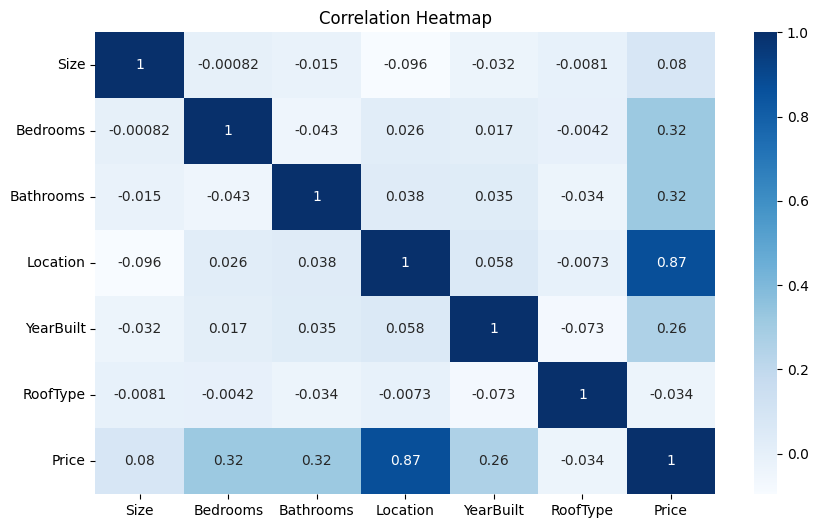

In [ ]:
# heatmap
import seaborn as sns
correlation = data.corr()
data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation ,annot=True ,cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

##2- Data Processing

In [ ]:
# check the Data type
data.dtypes

Size         float64
Bedrooms     float64
Bathrooms    float64
Location     float64
YearBuilt    float64
RoofType     float64
Price        float64
dtype: object

### Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
cols_to_normalize = ['Size','Bedrooms','Bathrooms','Location', 'YearBuilt','RoofType','Price']
scaled_data = scaler.fit(data[cols_to_normalize])
data[cols_to_normalize] = scaler.transform(data[cols_to_normalize])

In [ ]:
#MinMaxScaler
min_max_scaler = MinMaxScaler()

data[cols_to_normalize] = min_max_scaler.fit_transform(data[cols_to_normalize])

In [ ]:
 # check the data after normalization
data.describe()

,Size,Bedrooms,Bathrooms,Location,YearBuilt,RoofType,Price
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,0.445964,0.458958,0.483767,0.496987,0.483497,0.432037,0.509918
std,0.145450,0.169659,0.161331,0.157633,0.162837,0.147503,0.145690
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.353223,0.350191,0.375462,0.387709,0.377450,0.337114,0.412138
50%,0.444408,0.457253,0.487563,0.498391,0.486798,0.431132,0.511143
75%,0.532346,0.571755,0.586311,0.605894,0.592525,0.524365,0.608764
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##3- Data Visualization

### Box plot



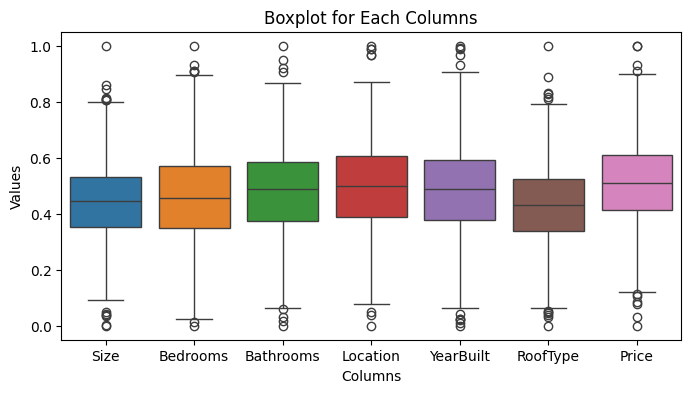

In [ ]:
#check for outliners value using box plot
import seaborn as sns
plt.figure(figsize=(8,4))

sns.boxplot((data))

plt.xlabel('Columns')  # change columns to feature
plt.ylabel('Values')
plt.title('Boxplot for Each Columns')
plt.show()

### Interactive plot using Plotly

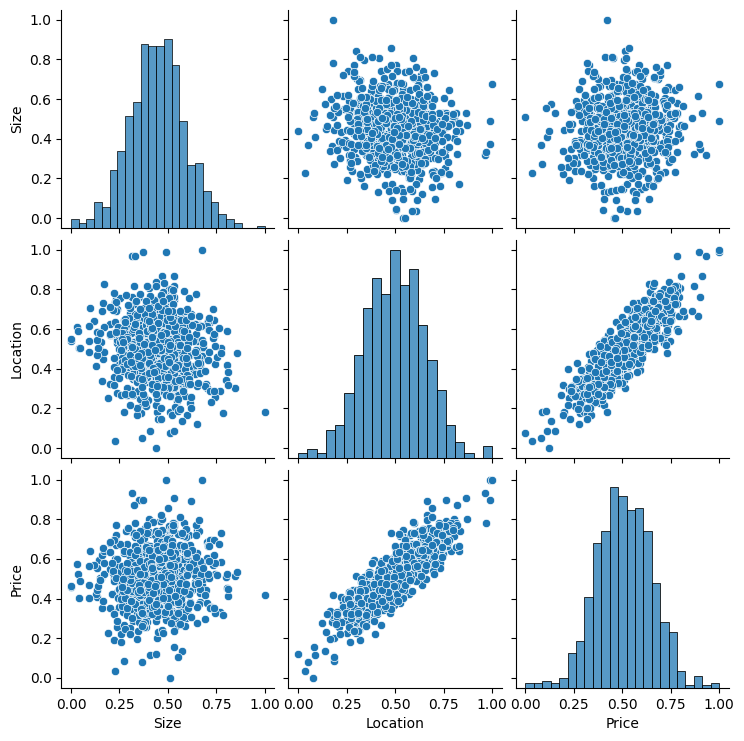

In [ ]:
#pairplot
sns.pairplot(data, vars=['Size', 'Location','Price'])
plt.show()

### scatter plot

Text(0.5, 1.0, 'price vs size')

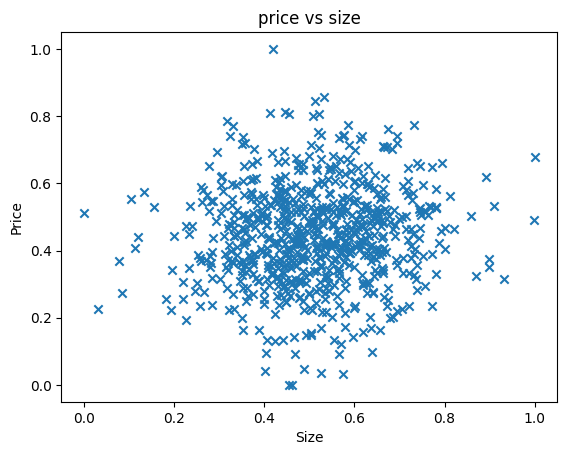

In [ ]:
# scatter to compare between two features (price , size  )

plt.scatter(data.Price,data.Size ,marker='x')
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('price vs size')


Text(0.5, 1.0, 'Price vs YearBuilt')

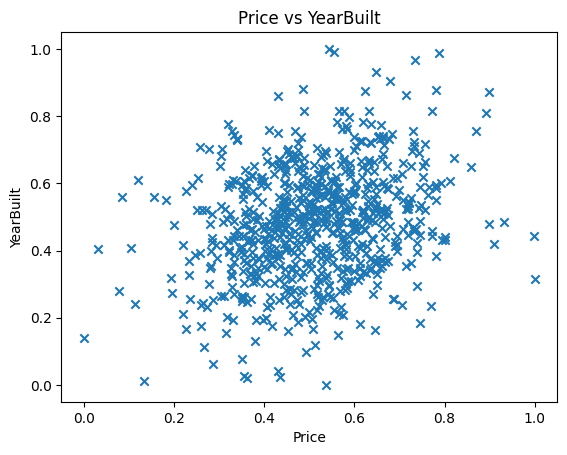

In [ ]:
#scatter to compare between two another features (price , YearBuilt  )
plt.scatter(data.Price,data.YearBuilt ,marker='x')
plt.xlabel('Price')
plt.ylabel('YearBuilt')
plt.title('Price vs YearBuilt')

##4- Predictive Modeling using Linear Regression




*   Split the Data

*   Train a Linear Regression
*   Evaluate it on the test set using r2_score metric

 **problem statemant :Given above data build a machine learning model that can predict House prices based on other features**


In [ ]:
# Split the data into features (X) and target variable (y)

y = data['Price'] # target
X = data.drop('Price' , axis = 1 )


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into training and test sets

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2, random_state=42)

# Linear Regression model
lr = LinearRegression()

# fit the model
lr.fit(X_train, y_train)

# Make predictions on the test set
predictions = lr.predict(X_test)

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.0005402208525635894
Mean Squared Error: 4.599004119077825e-07
R-squared: 0.9999788915641026


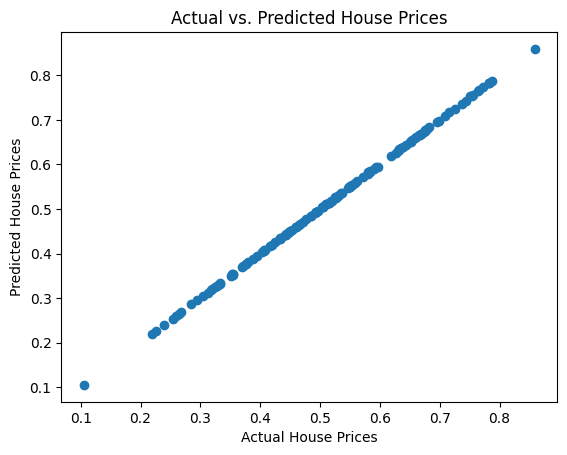

Linear Regression R^2 : 0.9999788915641026


In [ ]:
# Plot the predicted vs. actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()
lr.fit(X_train , y_train)
print(f"Linear Regression R^2 : {lr.score(X_test , y_test)}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
RF = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
RF.fit(X_train, y_train)

# Make predictions on the test set
predictions = RF.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.02915644508311163
Mean Squared Error: 0.0014054517818074123
R-squared: 0.9354927978427304


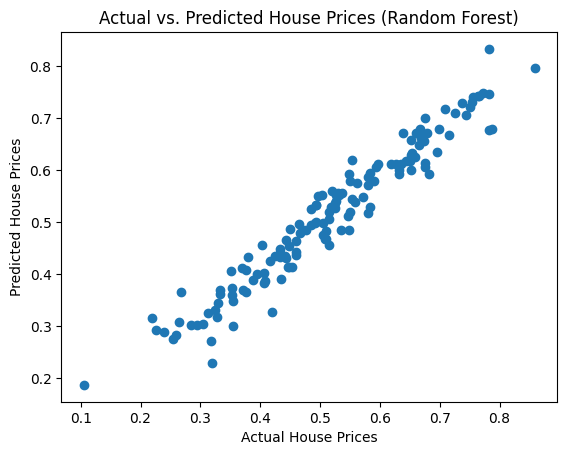

In [ ]:
# Plot the predicted vs. actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices (Random Forest)')
plt.show()

***here we noticed that the Linear Regression Model gives a more accurate prediction than the Random Forest Model***


# Part 2



>





# Question
1. Loop: Write a Python program that uses a 'for' loop to print all even numbers from 1 to 10. Then, use 'while' loop.

In [ ]:
# your code
num = 2
while num <= 10:
  print (num)
  num += 2

2
4
6
8
10


# Question
2. Control Flows: Question: Create a Python function named grade_classifier that takes a student's score as an argument and returns a string indicating their grade. Use the following criteria:

 Score >= 90:"A"

 80 <= Score < 90: "B"

 70 <= Score < 80: "C"

 60 <= Score < 70: "D"

 Score < 60: "F"

In [ ]:
def grade_classifier (num):
  if num >= 90:
    return "your grade is: A"
  elif num >= 80 and num < 90 :
    return "your grade is: B"
  elif num >= 70 and num < 80 :
    return "your grade is: C"
  elif num >= 60 and num < 70 :
    return "your grade is: D"
  elif num < 60 :
     return "F"
  else:
    return "Invalid input"
x= input("Enter your score:")
print(grade_classifier(int(x)))


Enter your score:89
your grade is: B


# Question
3. If Conditions: Write a Python program that prompts the user to enter their age. Use if-elif-else statements to categorize and print the user's age group as follows:
If the age is less than 13, print "Child."

 If the age is between 13 and 19 (inclusive), print "Teenager."

  If the age is between 20 and 59 (inclusive), print "Adult."

  If the age is 60 or older, print "Senior Citizen."

In [ ]:
# your code
age = int(input('Please enter your age:'))

if age < 13:
    print ('Child')
elif age >= 13 and age <= 19:
    print ('Teenager')
elif age >= 20 and age <= 59:
    print ('Adult')
else:
    print ('Senior Citizen')

Please enter your age:90
Senior Citizen


# Question
4. Functions: Define a Python function named multiply_numbers that takes two parameters (num1 and num2) and returns their product. Test the function with values 5 and 7.

In [ ]:
# your code
def multiply(num1, num2):
  return num1*num2

multiply(5,7)

35

# Question
5. Combine All the Above: Write a Python program that does the following:

Prompts the user to enter a number (user_num).

 Uses a loop to print all numbers from 1 to user_num (inclusive) that are divisible by 3.

  Calls the grade_classifier function to classify a user's score (you can use a predefined score for testing).
  
  Prints a message indicating whether the classified grade is satisfactory or not.

In [ ]:
# your code
user_num = int(input("Enter a number: "))

print(f"Numbers divisible by 3 from 1 to {user_num}:")
for num in range(1, user_num + 1):
    if num % 3 == 0:
        print(num)


Enter a number: 9
Numbers divisible by 3 from 1 to 9:
3
6
9
